# Download Data Set & Normalize

In [1]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [3]:
from keras.datasets import mnist #28x28
from keras.utils import np_utils
# Load dataset as train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Set numeric type to float32 from uint8
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

# Normalize value to [0, 1]
x_train /= 255
x_test /= 255

# Transform lables to one-hot encoding
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# Reshape the dataset into 4D array
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

Using TensorFlow backend.


# Define LeNet-5 Model

In [6]:
from keras.models import Sequential
from keras import models, layers
import keras
#Instantiate an empty model
model = Sequential()

# C1 Convolutional Layer
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation="tanh", input_shape=(28,28,1), padding="same"))

# S2 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding="valid"))

# C3 Convolutional Layer
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation="tanh", padding="valid"))

# S4 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))

# C5 Fully Connected Convolutional Layer --> matrix
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation="tanh", padding="valid"))
#Flatten the CNN output so that we can connect it with fully connected layers
model.add(layers.Flatten())

# FC6 Fully Connected Layer --> vectoe
model.add(layers.Dense(84, activation="tanh"))

#Output Layer with softmax activation
model.add(layers.Dense(10, activation="softmax"))

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer="SGD", metrics=["accuracy"])

W0608 16:50:15.933233 23000 deprecation_wrapper.py:119] From d:\programdata\anaconda3\envs\recsys\lib\site-packages\keras\backend\tensorflow_backend.py:4074: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.



# Model training

In [7]:
hist = model.fit(x=x_train,y=y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=1)

W0608 16:51:06.850410 23000 deprecation_wrapper.py:119] From d:\programdata\anaconda3\envs\recsys\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.7323 - accuracy: 0.8054 - val_loss: 0.3543 - val_accuracy: 0.9030
Epoch 2/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.3223 - accuracy: 0.9093 - val_loss: 0.2703 - val_accuracy: 0.9277
Epoch 3/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.2608 - accuracy: 0.9262 - val_loss: 0.2285 - val_accuracy: 0.9372
Epoch 4/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.2247 - accuracy: 0.9363 - val_loss: 0.2020 - val_accuracy: 0.9442
Epoch 5/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.1989 - accuracy: 0.9441 - val_loss: 0.1795 - val_accuracy: 0.9503
Epoch 6/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.1783 - accuracy: 0.9493 - val_loss: 0.1628 - val_accuracy: 0.9548
Epoch 7/10
60000/60000 [==============================] - 6s 99us

# Evaluate the Model

In [9]:
test_score = model.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

10000/10000 [==============================] - 1s 111us/step
Test loss 0.1150, accuracy 96.67%


In [16]:
print(hist.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


# Visualize the Training Process

Text(0, 0.5, 'acc')

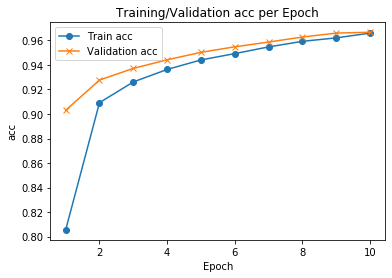

In [17]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + hist.history["accuracy"], "o-")
ax.plot([None] + hist.history["val_accuracy"], "x-")
# Plot legend and use the best location automatically: loc = 0.
ax.legend(["Train acc", "Validation acc"], loc = 0)
ax.set_title("Training/Validation acc per Epoch")
ax.set_xlabel("Epoch")
ax.set_ylabel("acc")

Text(0, 0.5, 'Loss')

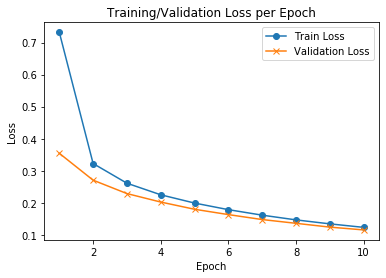

In [18]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + hist.history["loss"], "o-")
ax.plot([None] + hist.history["val_loss"], "x-")
# Plot legend and use the best location automatically: loc = 0.
ax.legend(["Train Loss", "Validation Loss"], loc = 0)
ax.set_title("Training/Validation Loss per Epoch")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")